In [0]:
import numpy as np
import pandas as pd
import cv2
from tqdm import tqdm
tqdm.pandas()
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

In [0]:
train = pd.read_csv('/content/drive/My Drive/Zindi problems /Third/train_folds.csv')

In [0]:
def load_image(img_path):
  image = cv2.imread(img_path)
  return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [0]:
train_images = train["im_path"].sample(10, random_state=2020).progress_apply(load_image)

NameError: ignored

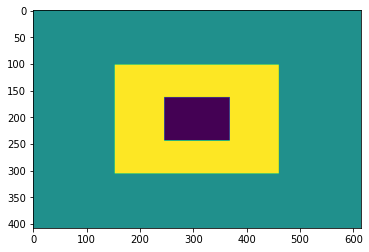

In [0]:
def init_grabcut_mask(h, w):
    mask = np.ones((h, w), np.uint8) * cv2.GC_PR_BGD
    mask[h//4:3*h//4, w//4:3*w//4] = cv2.GC_PR_FGD
    mask[2*h//5:3*h//5, 2*w//5:3*w//5] = cv2.GC_FGD
    return mask

plt.imshow(init_grabcut_mask(3*136, 3*205))

In [0]:
def add_contours(image, mask):
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    if len(contours) != 0:
        cv2.drawContours(image, contours, -1, (255, 0, 0), 3)
        c = max(contours, key = cv2.contourArea)
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0) ,2)
    


def remove_background(image):
    h, w = image.shape[:2]
    mask = init_grabcut_mask(h, w)
    bgm = np.zeros((1, 65), np.float64)
    fgm = np.zeros((1, 65), np.float64)
    cv2.grabCut(image, mask, None, bgm, fgm, 1, cv2.GC_INIT_WITH_MASK)
    mask_binary = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
    result = cv2.bitwise_and(image, image, mask = mask_binary)
    return result

In [0]:
%%time
rows, cols = (len(train_images), 2)
axes_pad = 0.2
fig_h = 4.0 * rows + axes_pad * (rows-1) 
fig_w = 4.0 * cols + axes_pad * (cols-1) 
fig = plt.figure(figsize=(fig_w, fig_h))
grid = ImageGrid(fig, 111, nrows_ncols=(rows, cols), axes_pad=0.2)   
        
for i, ax in enumerate(grid):
    im = cv2.resize(train_images.iloc[i // 2], (3*205, 3*136))
    if i % 2 == 1:
        im = remove_background(im)
        cv2.imwrite( f'im_path{i}.png', cv2.cvtColor(im, cv2.COLOR_RGB2BGR) )
    ax.imshow(im)   
  

NameError: ignored

#Edit the data set  


In [0]:
def edite_img(x) : 
  try :
    im= load_image(x['im_path']) 
    im = cv2.resize(im, (3*205, 3*136))
    im = remove_background(im)
    cv2.imwrite( x['new_path'], cv2.cvtColor(im, cv2.COLOR_RGB2BGR) )
  except : 
    print(x['im_path'])

In [0]:
getattr(tqdm, '_instances', {}).clear()

train[train['target']!='healthy_wheat'][['im_path','new_path']].progress_apply(edite_img,axis=1)

 14%|█▍        | 105/734 [06:26<20:02,  1.91s/it]

/content/drive/My Drive/Zindi problems /Third/train/leaf_rust/7U06EV.gif


100%|██████████| 734/734 [1:00:23<00:00,  4.94s/it]


142    None
143    None
144    None
145    None
146    None
       ... 
871    None
872    None
873    None
874    None
875    None
Length: 734, dtype: object

In [0]:
import os
test= pd.DataFrame()
test['im_name'] = os.listdir('/content/drive/My Drive/Zindi problems /Third/test/') 
test['name']=test['im_name'].str.extract(r'(?P<name>\w*).\w*')


test['im_path'] = '/content/drive/My Drive/Zindi problems /Third/test/'+'/'+test['im_name']
test['new_path'] = '/content/drive/My Drive/Zindi problems /Third/Test/'+'/'+test['name']+'.png'

test.to_csv("/content/drive/My Drive/Zindi problems /Third/test.csv",index=False)

In [0]:
getattr(tqdm, '_instances', {}).clear()

test[['im_path','new_path']].progress_apply(edite_img,axis=1)

 75%|███████▌  | 460/611 [36:12<13:47,  5.48s/it]

/content/drive/My Drive/Zindi problems /Third/test//untitled


100%|██████████| 611/611 [50:07<00:00,  4.92s/it]


0      None
1      None
2      None
3      None
4      None
       ... 
606    None
607    None
608    None
609    None
610    None
Length: 611, dtype: object